<a href="https://colab.research.google.com/github/niwanshu16/FDSP2019/blob/master/DL_RNN_LSTM_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/DeepLearning/RNN')

In [0]:
apple_training_complete = pd.read_csv('apple_training.csv')  

In [6]:
apple_training_complete.shape

(1260, 7)

In [8]:
apple_training_complete.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,53.974899,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.684914,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,54.982059,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,53.450539,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,53.136124,121039100


In [0]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values  


In [10]:
apple_training_processed.shape

(1260, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)  

In [12]:
apple_training_scaled.shape

(1260, 1)

In [13]:
apple_training_processed #data before scaling

array([[ 72.932854],
       [ 79.117142],
       [ 78.26857 ],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [14]:
apple_training_scaled


array([[0.14628787],
       [0.19795893],
       [0.19086893],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

In [0]:
features_set = []  
labels = []  
for i in range(60, 1260):  
    features_set.append(apple_training_scaled[i-60:i,0])
    labels.append(apple_training_scaled[i, 0])

In [16]:
features_set

[array([0.14628787, 0.19795893, 0.19086893, 0.17784673, 0.15997849,
        0.16858435, 0.16057534, 0.16779659, 0.15878493, 0.13691814,
        0.13169014, 0.12732155, 0.1460253 , 0.13195271, 0.1391621 ,
        0.14423488, 0.08597518, 0.07605635, 0.059513  , 0.08418477,
        0.08239435, 0.08237052, 0.08491287, 0.07870612, 0.06693722,
        0.08176175, 0.0898544 , 0.10268561, 0.10566959, 0.10926234,
        0.09458105, 0.09137026, 0.09653853, 0.08728814, 0.08321794,
        0.06926475, 0.07314397, 0.07863453, 0.0666627 , 0.07216522,
        0.06693722, 0.05971593, 0.04754117, 0.03999762, 0.05555025,
        0.04360229, 0.0499284 , 0.0498687 , 0.05685129, 0.04831701,
        0.05354501, 0.05963236, 0.06383384, 0.08537839, 0.08289565,
        0.07430177, 0.07950586, 0.09157316, 0.0924684 , 0.08174982]),
 array([0.19795893, 0.19086893, 0.17784673, 0.15997849, 0.16858435,
        0.16057534, 0.16779659, 0.15878493, 0.13691814, 0.13169014,
        0.12732155, 0.1460253 , 0.13195271, 0.

In [0]:
features_set, labels = np.array(features_set), np.array(labels)  


In [18]:
features_set.shape

(1200, 60)

In [0]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  


In [20]:
features_set.shape

(1200, 60, 1)

In [21]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout

Using TensorFlow backend.


In [22]:
model = Sequential()

W0728 08:24:33.455063 140500315678592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [23]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


W0728 08:24:46.503705 140500315678592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 08:24:46.517511 140500315678592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [24]:
model.add(Dropout(0.2))  


W0728 08:24:50.874217 140500315678592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0728 08:24:50.888278 140500315678592 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
Total params: 10,400
Trainable params: 10,400
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [0]:
model.add(Dense(units = 1))  


In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


W0728 08:25:07.024943 140500315678592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [30]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)  

W0728 08:25:10.619573 140500315678592 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 08:25:13.123099 140500315678592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0438
Epoch 2/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 3/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 4/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 5/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0035
Epoch 6/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 7/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0037
Epoch 8/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 9/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0035
Epoch 10/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0035
Epoch 11/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 12/100
1200/1200 [==============================] - 6s 5ms/step - lo

# Testing the LSTM

In [0]:
apple_testing_complete = pd.read_csv('apple_testing.csv')  
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values  

In [32]:
apple_testing_processed.shape

(20, 1)

Converting test data into right format
For each day of January 2018, we want our feature set to contain the opening stock prices for the previous 60 days. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing

In [0]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)


In [34]:
apple_total.shape

(1280,)

Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set.

In [0]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values 

In [36]:
test_inputs.shape

(80,)

Scale our test data as we did in train data

In [0]:
test_inputs = test_inputs.reshape(-1,1) 

In [38]:
test_inputs.shape

(80, 1)

In [0]:
 
test_inputs = scaler.transform(test_inputs)  

In [40]:
test_inputs[0]

array([0.82512526])

In [0]:
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])


In [0]:
test_features = np.array(test_features) 

In [43]:
test_features.shape

(20, 60)

In [0]:
 
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [45]:
test_features.shape

(20, 60, 1)

In [0]:
predictions = model.predict(test_features)  

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.

In [0]:
predictions = scaler.inverse_transform(predictions)

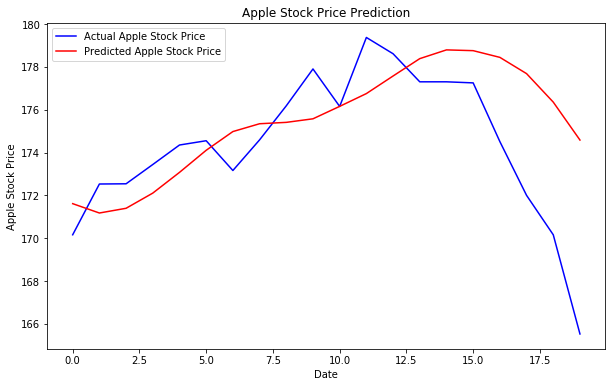

In [48]:
plt.figure(figsize=(10,6))  
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()  

Conclusion
A long short-term memory network (LSTM) is one of the most commonly used neural networks for time series analysis. The ability of LSTM to remember previous information makes it ideal for such tasks. In this article, we saw how we can use LSTM for the Apple stock price prediction.